<a href="https://colab.research.google.com/github/vsairam-uc/Intro-To-AI/blob/main/AI_Week_5_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Public Health Factors have the Greatest Impact on Life Expectancy


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Task 1:
Read the raw data from the source file in Python.

Perform feature engineering:


*  Population Size : Create a population range that includes three categories:
** Small - a population between 1,000 and 29,999,
** Medium - a population between 30,000 and 99,999, and
** Large - a population of 100,000 or more.

*  Lifestyle : Create a lifestyle feature that combines alcohol consumption and BMI.
* Economy : Create an economy feature that combines population and GDP.
* Death Ratio : Determine the death ratio between adult and infant mortality.








In [2]:
df = pd.read_csv('Life_Expectancy_Data.csv')

In [3]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [5]:
def get_population_category(population_size):
    if 1000 <= population_size <= 29999:
        return 'Small'
    elif 30000 <= population_size <= 99999:
        return 'Medium'
    elif population_size >= 100000:
        return 'Large'
    else:
        return 'Very Small'

In [6]:
df['Population_Category'] = df['Population'].apply(get_population_category)

In [7]:
df['Population_Category'].value_counts()

,count
Population_Category,
Large,1874
Very Small,683
Small,205
Medium,176


In [8]:
# Create Lifesyle features
df['Lifestyle'] = df['Alcohol'] * df[' BMI ']
print(df['Lifestyle'].head())

0    0.191
1    0.186
2    0.181
3    0.176
4    0.172
Name: Lifestyle, dtype: float64


In [9]:
# Create Economy feature
df['Economy'] = df['Population'] * df['GDP']
print(df['Economy'].head())

0    1.971086e+10
1    2.007083e+08
2    2.004633e+10
3    2.476810e+09
4    1.892519e+08
Name: Economy, dtype: float64


In [10]:
# Create Death Ratio feature
df['Death_Ratio'] = df['Adult Mortality'] / df['infant deaths']
print(df['Death_Ratio'].head())

0    4.241935
1    4.234375
2    4.060606
3    3.942029
4    3.873239
Name: Death_Ratio, dtype: float64


In [11]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Population_Category,Lifestyle,Economy,Death_Ratio
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,584.259210,33736494.0,17.2,17.3,0.479,10.1,Large,0.191,1.971086e+10,4.241935
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,612.696514,327582.0,17.5,17.5,0.476,10.0,Large,0.186,2.007083e+08,4.234375
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,631.744976,31731688.0,17.7,17.7,0.470,9.9,Large,0.181,2.004633e+10,4.060606
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,669.959000,3696958.0,17.9,18.0,0.463,9.8,Large,0.176,2.476810e+09,3.942029
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,63.537231,2978599.0,18.2,18.2,0.454,9.5,Large,0.172,1.892519e+08,3.873239


### Task 2:
Perform data cleaning by either removing any fragmented observations or by imputing missing values as necessary. Generate scatter plots between each predictor with the target variable to check the linear relationship and apply data transformations like log transform, if necessary.

In [12]:
# Check for missing values
print(df.isnull().sum())

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
Population_Category                  0
Lifestyle                          211
Economy                            674
Death_Ratio              

In [13]:
# Impute missing values with median
for column in df.columns:
    if df[column].dtype != 'object':
        df[column].fillna(df[column].median(), inplace=True)

In [14]:
# Check for missing values
print(df.isnull().sum())

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
Population_Category                0
Lifestyle                          0
Economy                            0
Death_Ratio                        0
dtype: int64


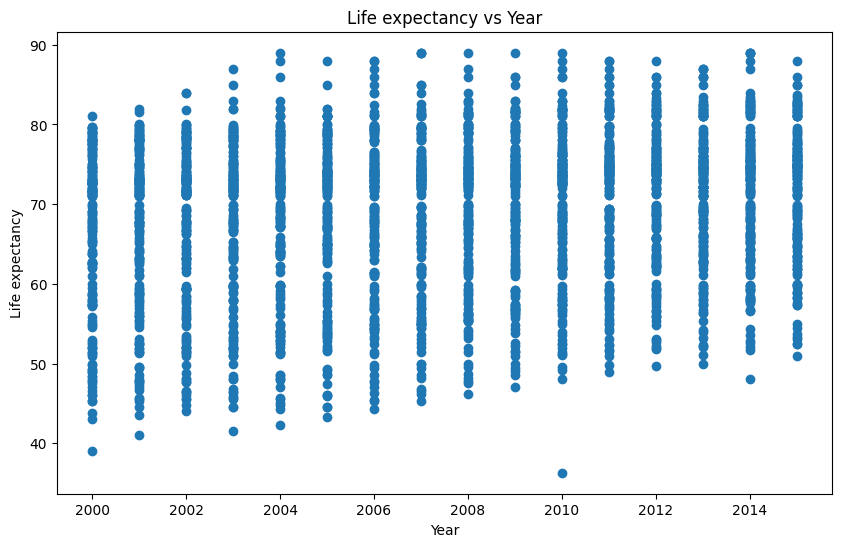

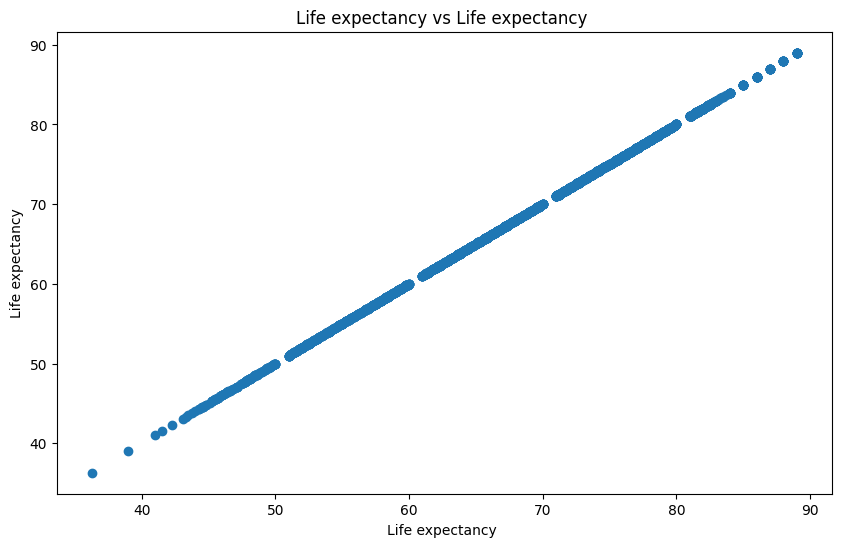

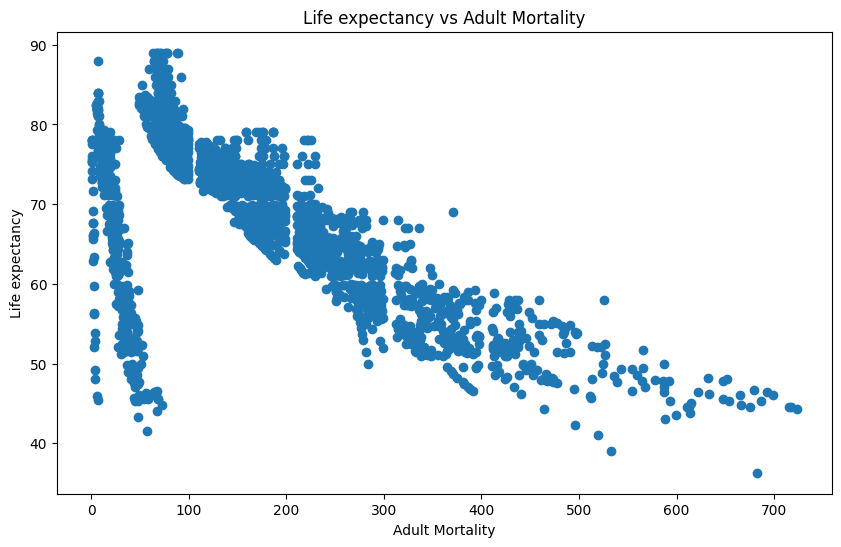

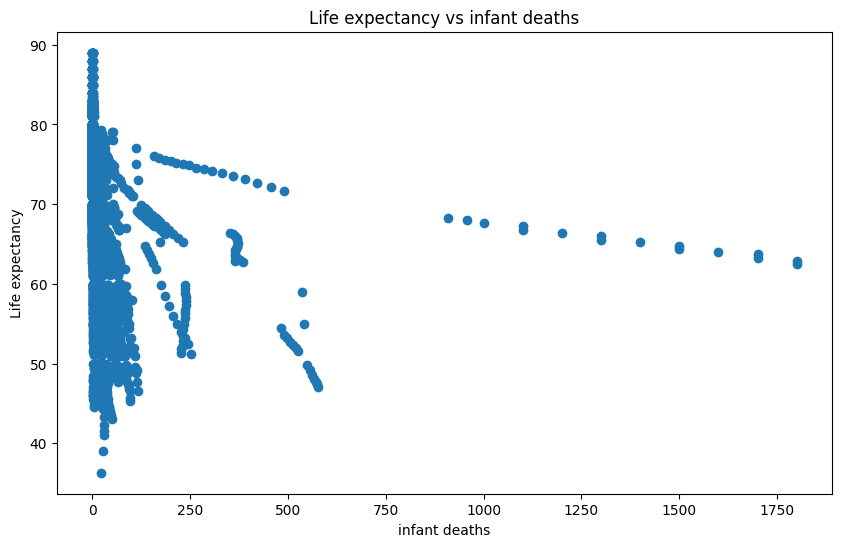

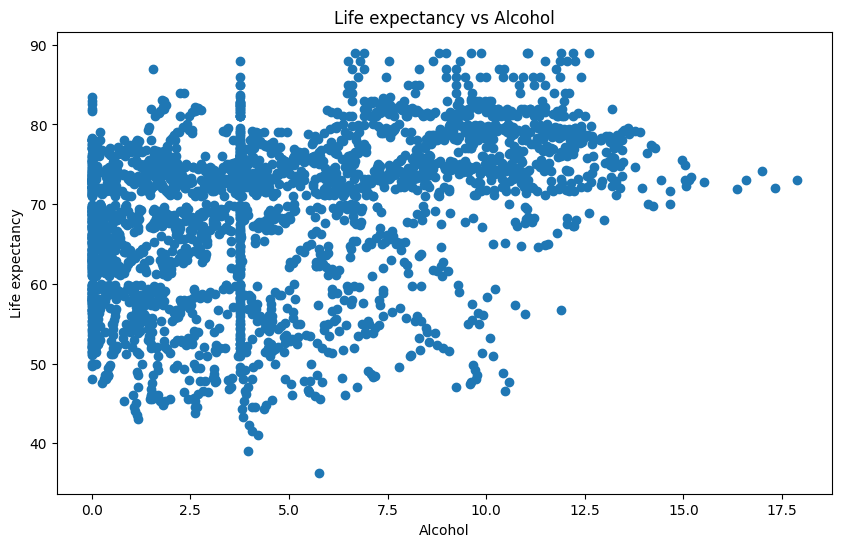

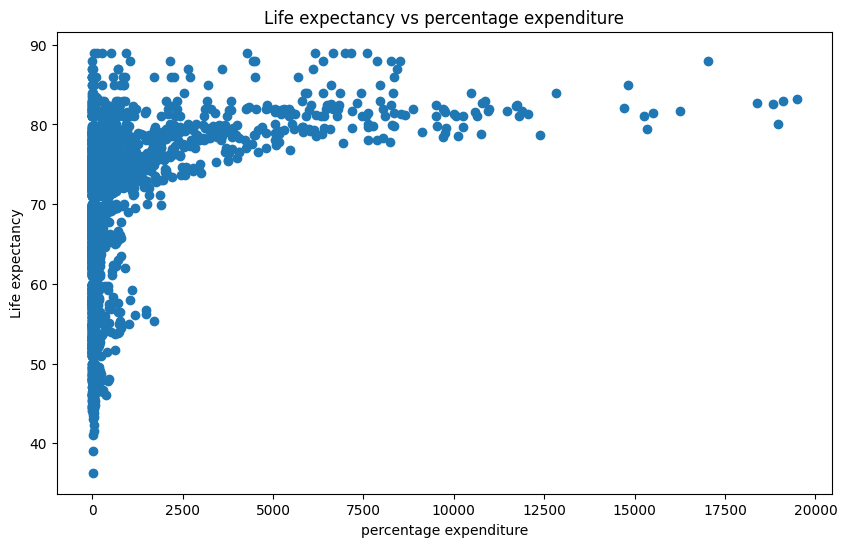

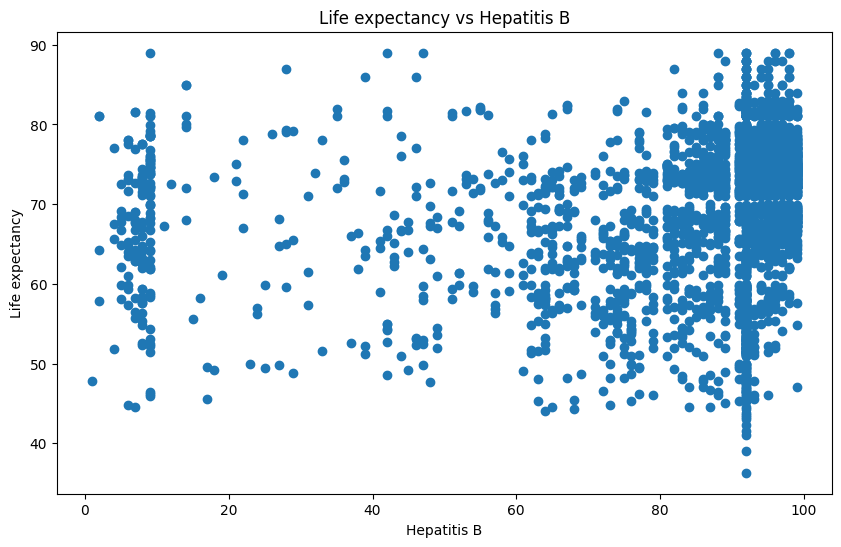

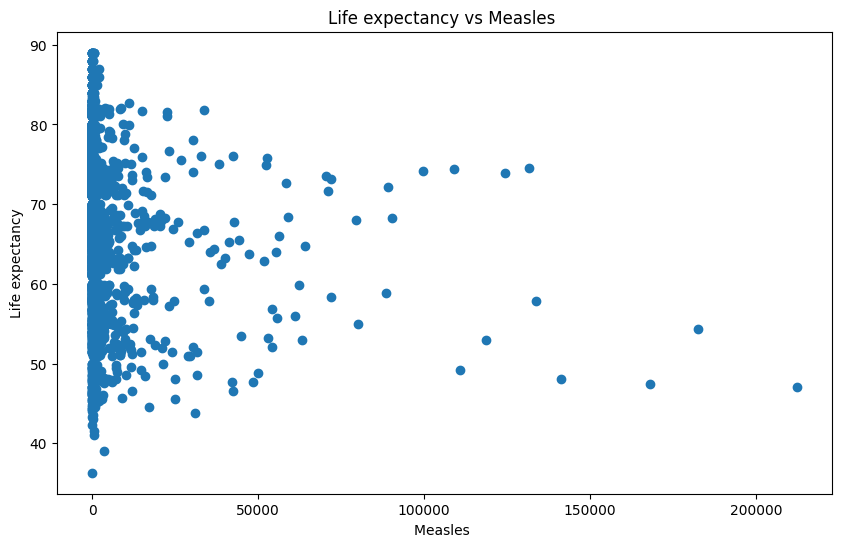

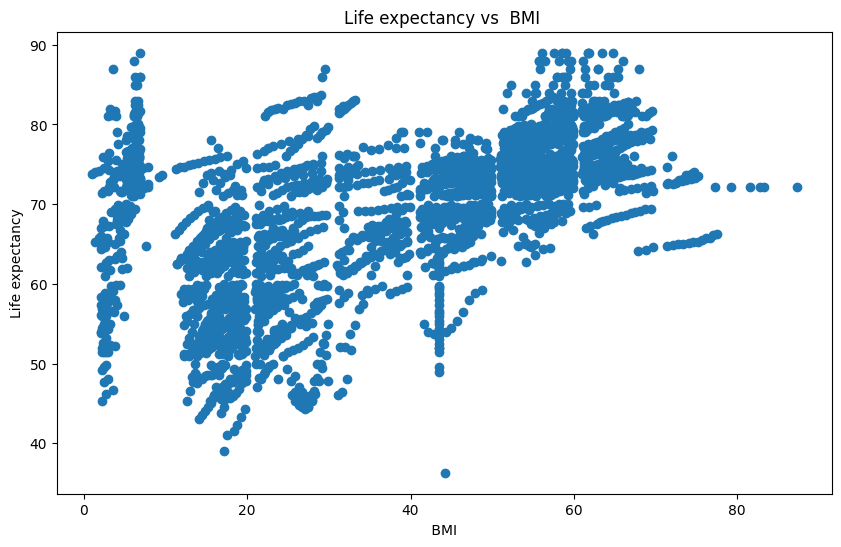

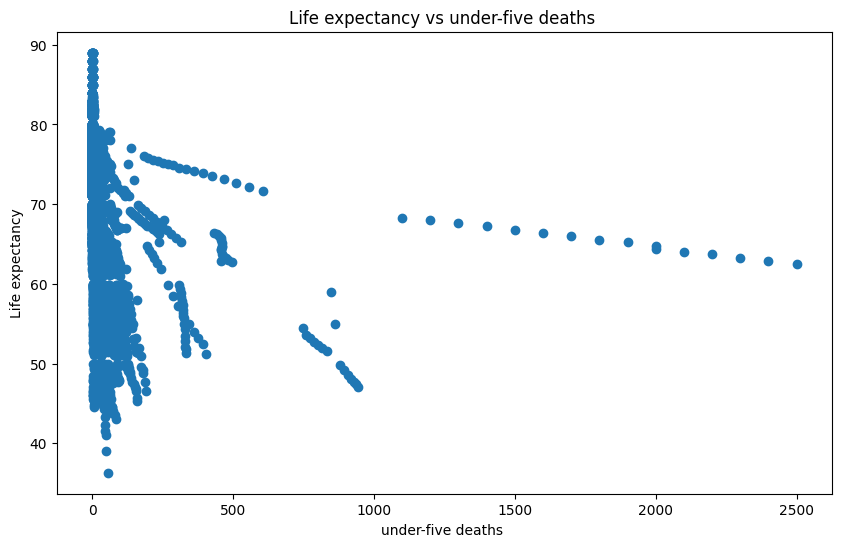

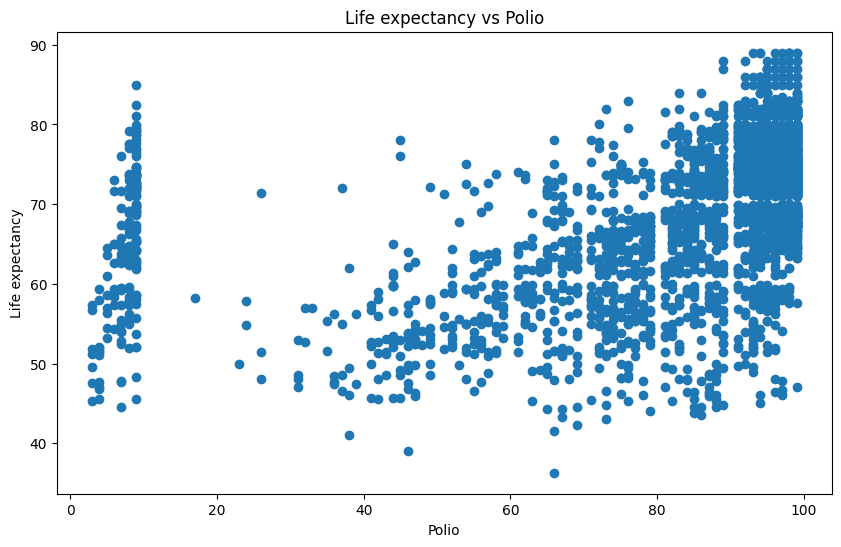

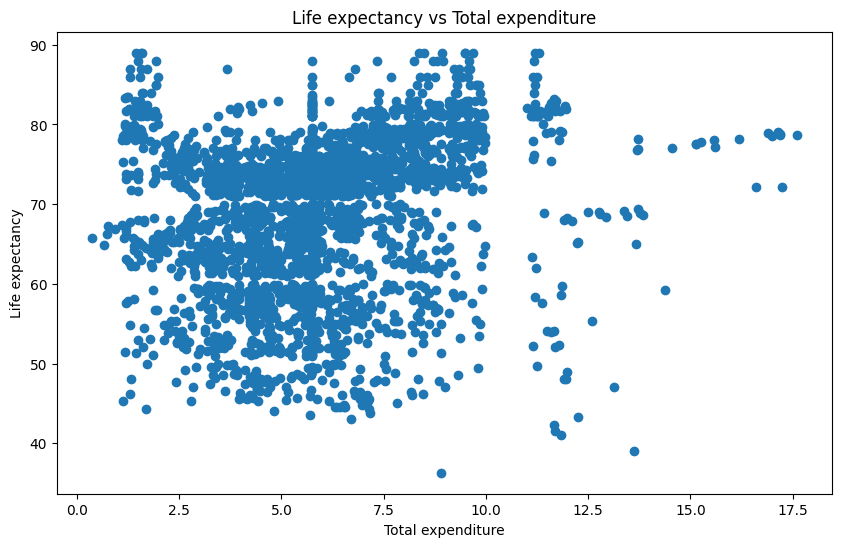

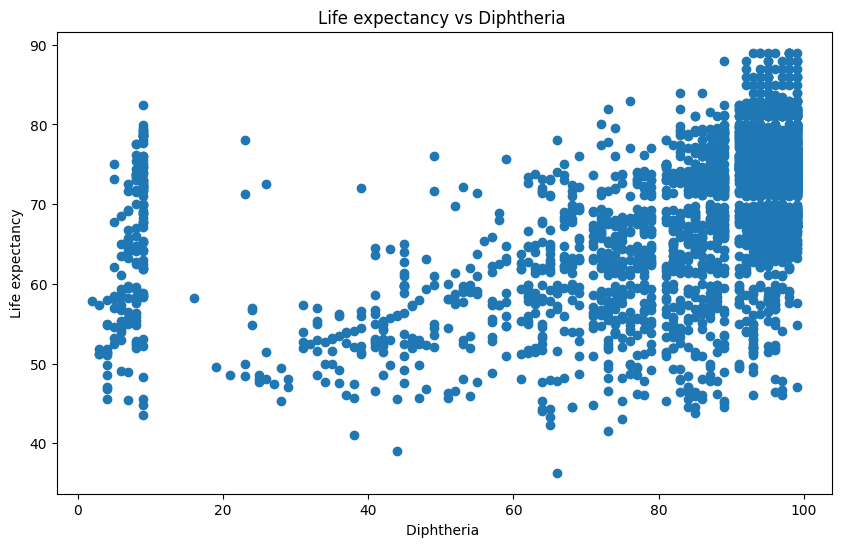

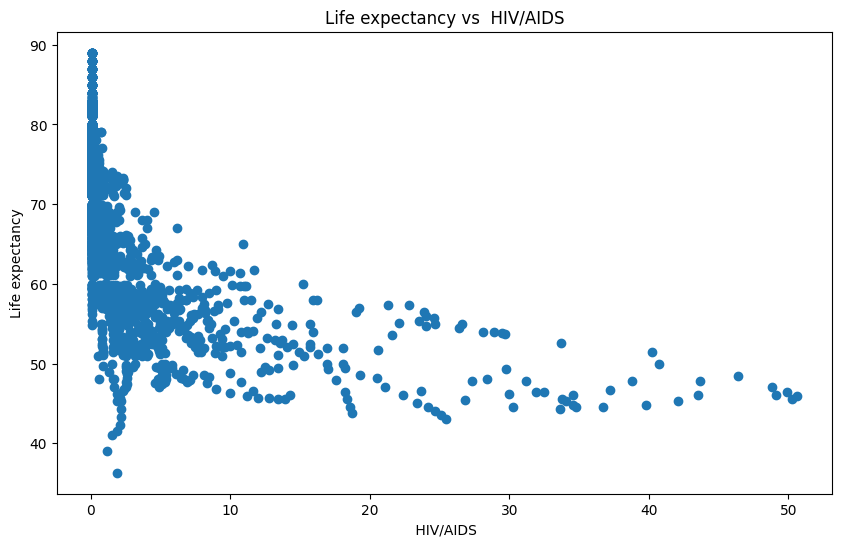

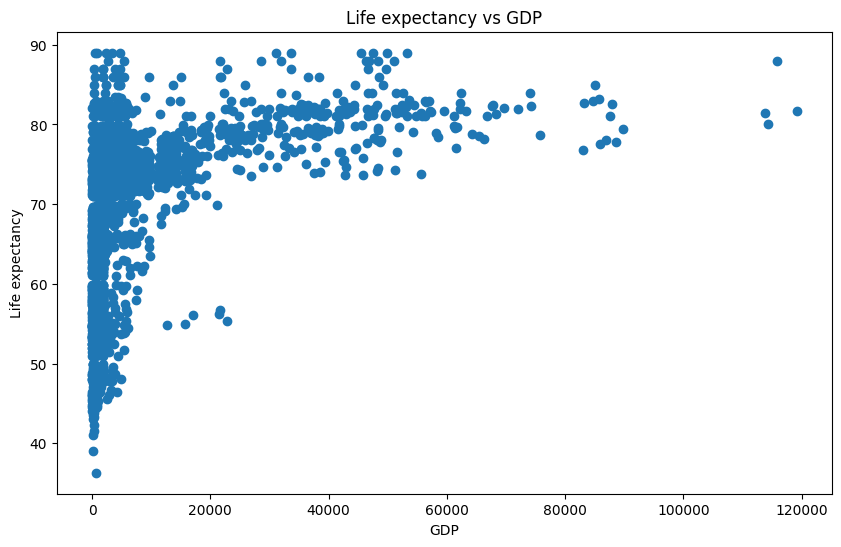

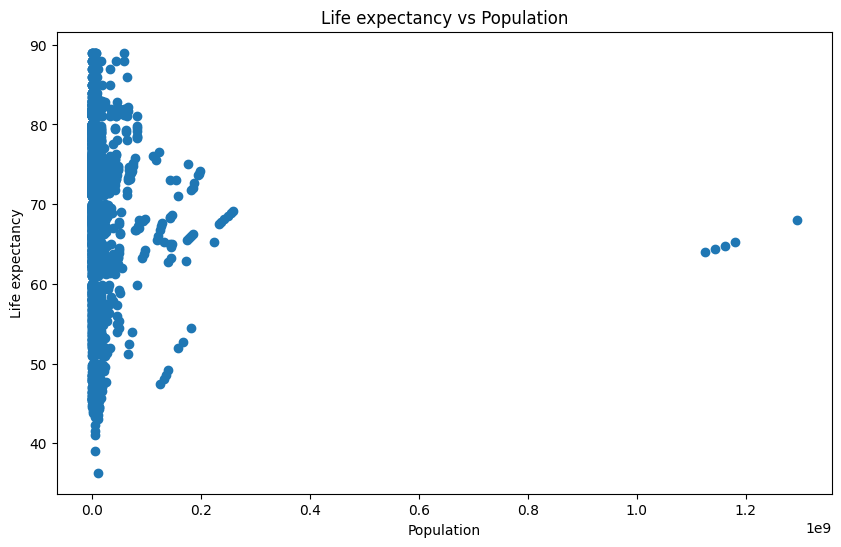

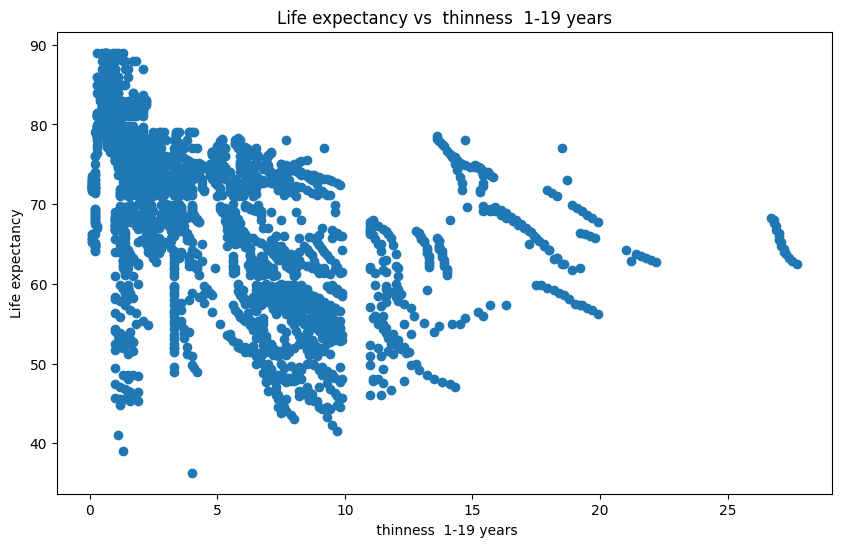

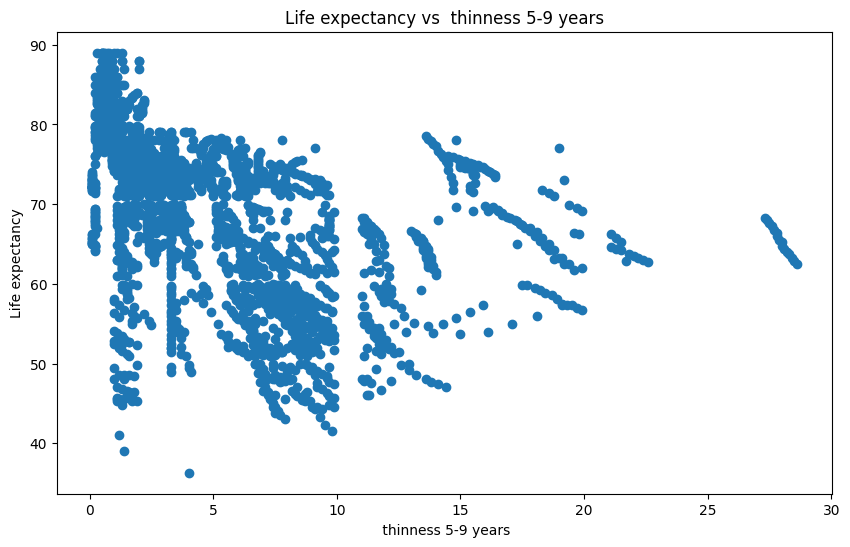

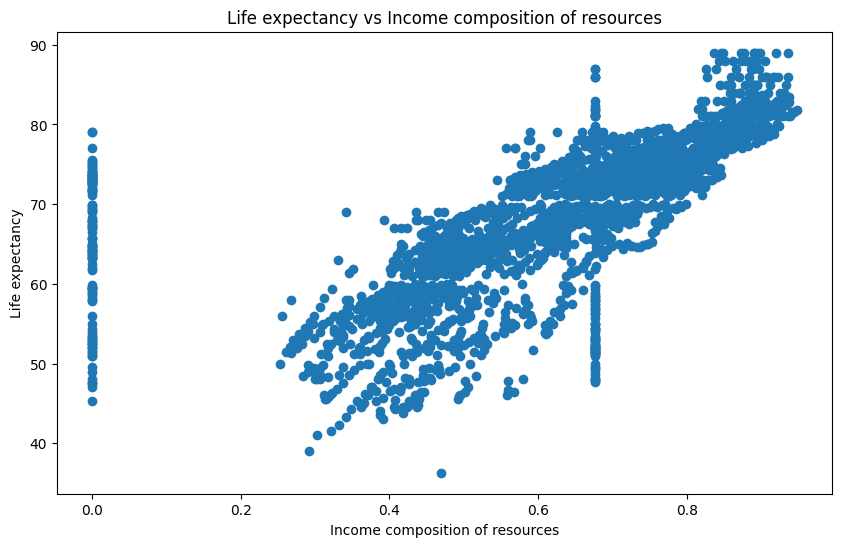

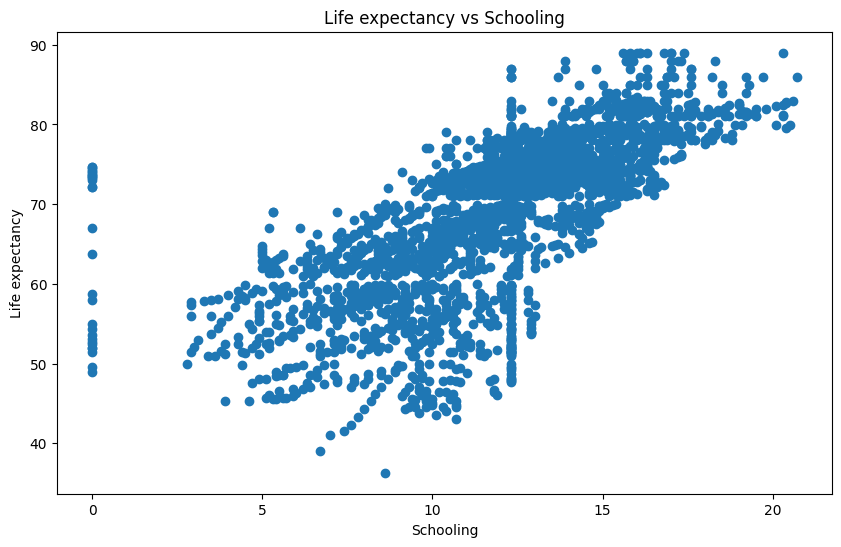

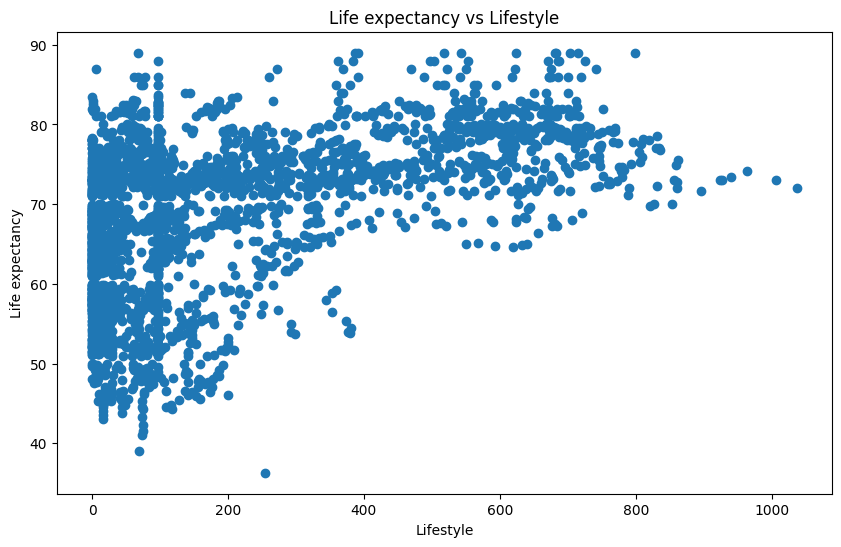

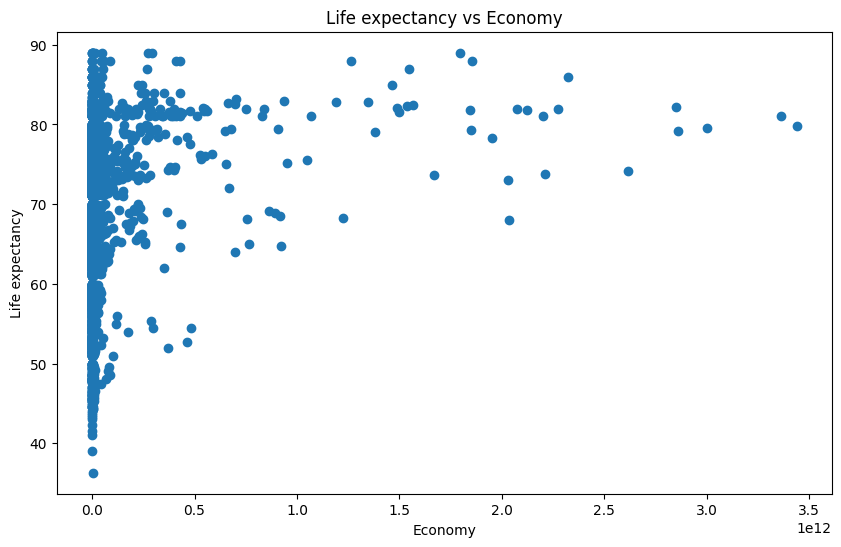

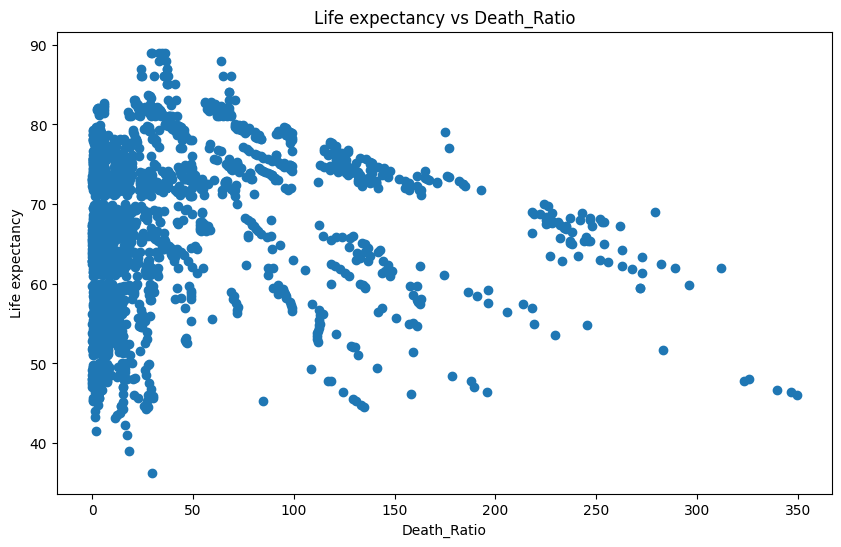

In [15]:
# Generate scatter plots
numeric_columns = df.select_dtypes(include=[np.number]).columns
for column in numeric_columns:
    if column != 'Life expectancy':
        plt.figure(figsize=(10, 6))
        plt.scatter(df[column], df['Life expectancy '])
        plt.xlabel(column)
        plt.ylabel('Life expectancy')
        plt.title(f'Life expectancy vs {column}')
        plt.show()

In [16]:
skewed_columns = ['GDP', 'Population', 'Alcohol', 'percentage expenditure', 'Economy']
for column in skewed_columns:
    df[f'{column}_log'] = np.log1p(df[column])

In [17]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Schooling,Population_Category,Lifestyle,Economy,Death_Ratio,GDP_log,Population_log,Alcohol_log,percentage expenditure_log,Economy_log
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,10.1,Large,0.191,1.971086e+10,4.241935,6.372055,17.334091,0.00995,4.280542,23.704435
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,10.0,Large,0.186,2.007083e+08,4.234375,6.419501,12.699497,0.00995,4.311116,19.117363
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,9.9,Large,0.181,2.004633e+10,4.060606,6.450067,17.272826,0.00995,4.307023,23.721312
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,9.8,Large,0.176,2.476810e+09,3.942029,6.508708,15.123021,0.00995,4.371777,21.630237
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,9.5,Large,0.172,1.892519e+08,3.873239,4.167242,14.906964,0.00995,2.091507,19.058590


### Task 3:
Generate a correlation heat map to assess multicollinearity with the threshold set as 0.75. All variables above 0.75 need to be dropped.

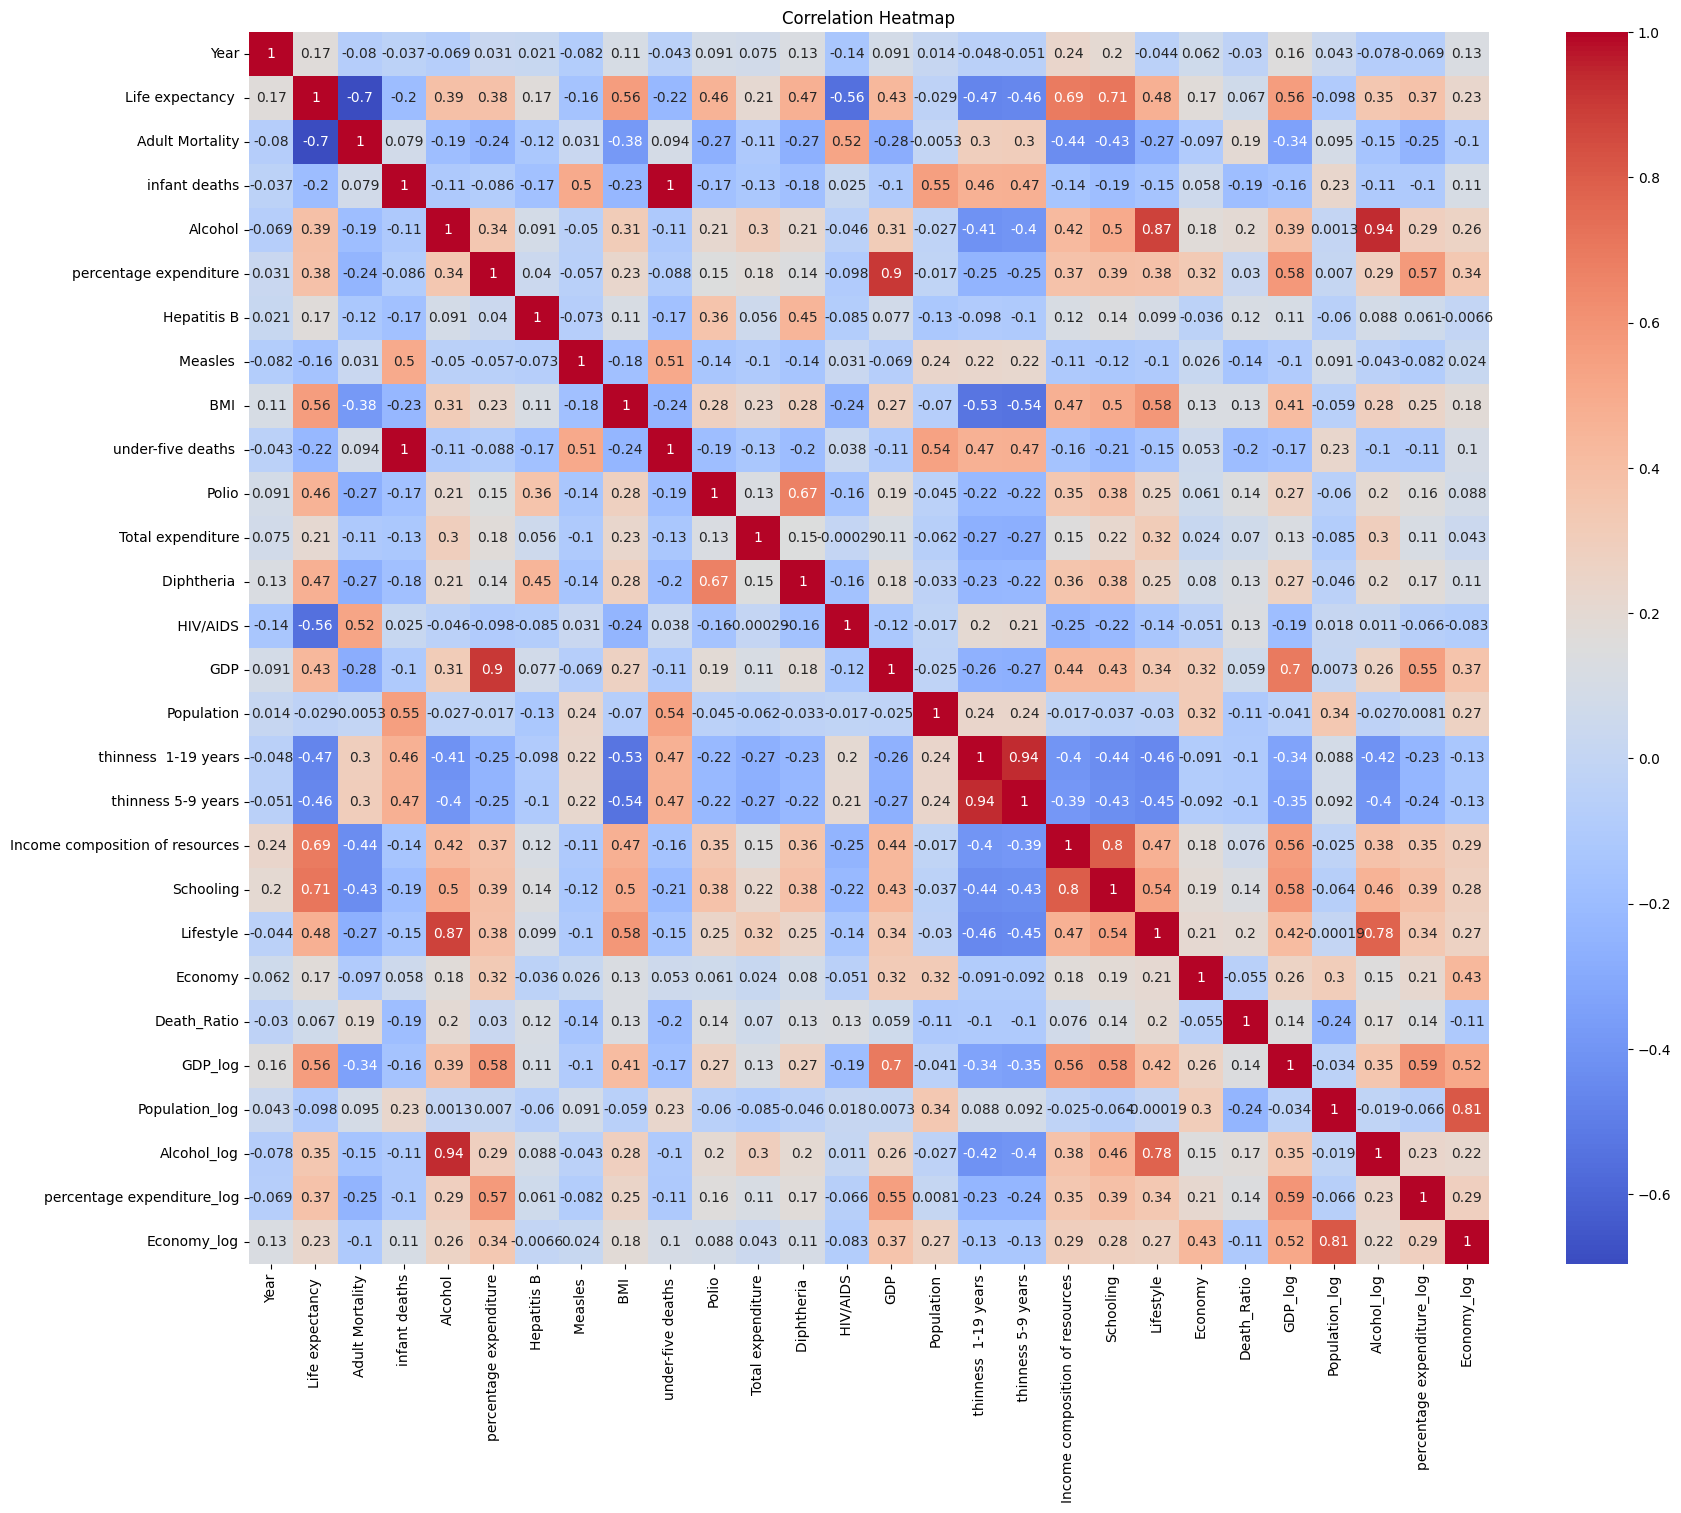

In [18]:
# Generate correlation heatmap
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [19]:
# Drop highly correlated variables
threshold = 0.75
high_corr_vars = np.where(np.abs(corr_matrix) > threshold)
high_corr_vars = [(corr_matrix.index[x], corr_matrix.columns[y]) for x, y in zip(*high_corr_vars) if x != y and x < y]
print(high_corr_vars)
for var1, var2 in high_corr_vars:
    if var1 in df.columns and var2 in df.columns:
        if df[var1].corr(df['Life expectancy ']) > df[var2].corr(df['Life expectancy ']):
            df.drop(var2, axis=1, inplace=True)
        else:
            df.drop(var1, axis=1, inplace=True)

[('infant deaths', 'under-five deaths '), ('Alcohol', 'Lifestyle'), ('Alcohol', 'Alcohol_log'), ('percentage expenditure', 'GDP'), (' thinness  1-19 years', ' thinness 5-9 years'), ('Income composition of resources', 'Schooling'), ('Lifestyle', 'Alcohol_log'), ('Population_log', 'Economy_log')]


In [20]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Hepatitis B,Measles,BMI,Polio,...,Population,thinness 5-9 years,Schooling,Population_Category,Lifestyle,Economy,Death_Ratio,GDP_log,percentage expenditure_log,Economy_log
0,Afghanistan,2015,Developing,65.0,263.0,62,65.0,1154,19.1,6.0,...,33736494.0,17.3,10.1,Large,0.191,1.971086e+10,4.241935,6.372055,4.280542,23.704435
1,Afghanistan,2014,Developing,59.9,271.0,64,62.0,492,18.6,58.0,...,327582.0,17.5,10.0,Large,0.186,2.007083e+08,4.234375,6.419501,4.311116,19.117363
2,Afghanistan,2013,Developing,59.9,268.0,66,64.0,430,18.1,62.0,...,31731688.0,17.7,9.9,Large,0.181,2.004633e+10,4.060606,6.450067,4.307023,23.721312
3,Afghanistan,2012,Developing,59.5,272.0,69,67.0,2787,17.6,67.0,...,3696958.0,18.0,9.8,Large,0.176,2.476810e+09,3.942029,6.508708,4.371777,21.630237
4,Afghanistan,2011,Developing,59.2,275.0,71,68.0,3013,17.2,68.0,...,2978599.0,18.2,9.5,Large,0.172,1.892519e+08,3.873239,4.167242,2.091507,19.058590


In [21]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Hepatitis B', 'Measles ', ' BMI ', 'Polio',
       'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness 5-9 years', 'Schooling', 'Population_Category', 'Lifestyle',
       'Economy', 'Death_Ratio', 'GDP_log', 'percentage expenditure_log',
       'Economy_log'],
      dtype='object')

### Task 4:
Eliminate possible outliers by generating box-whisker plots.

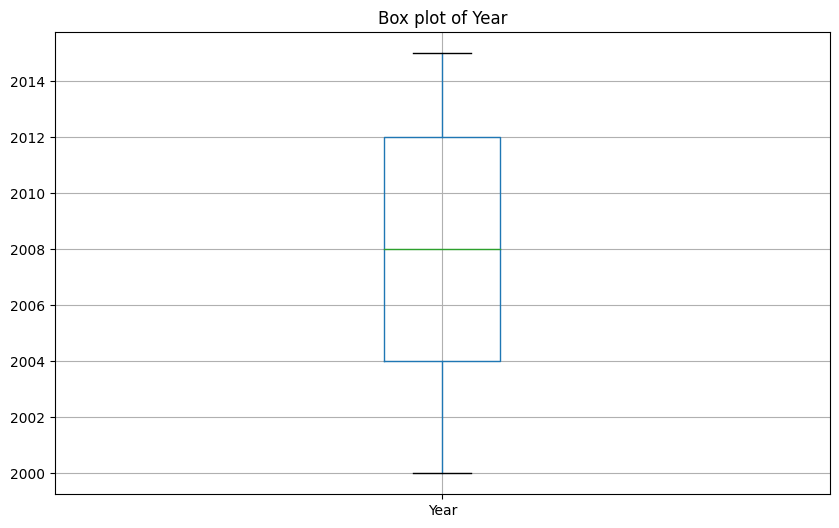

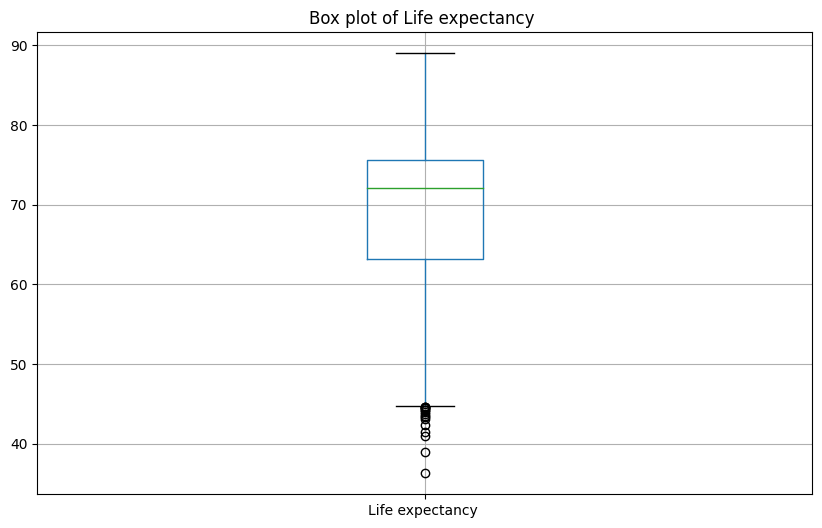

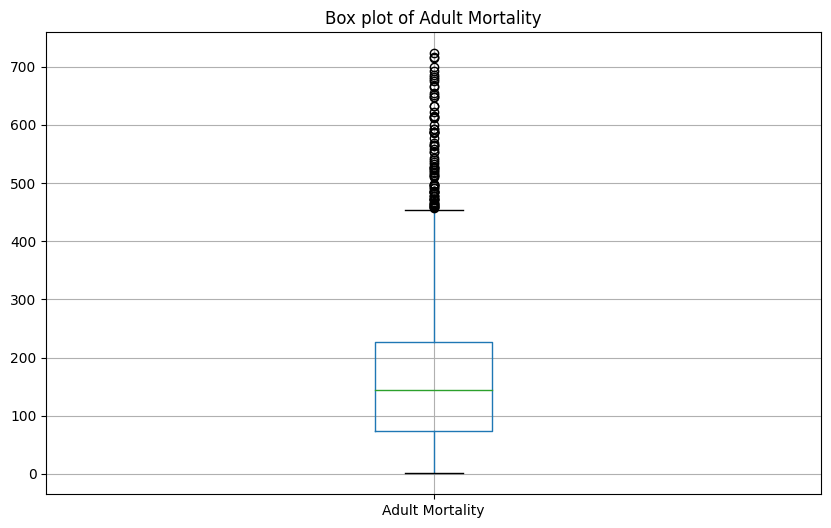

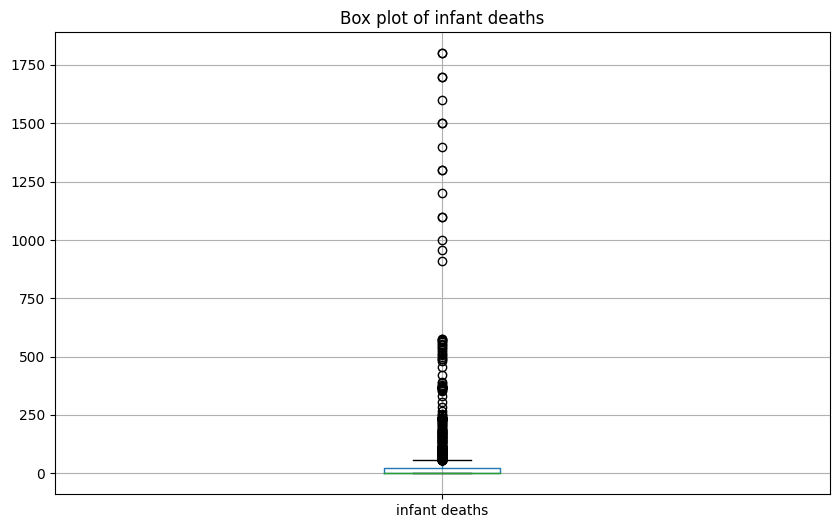

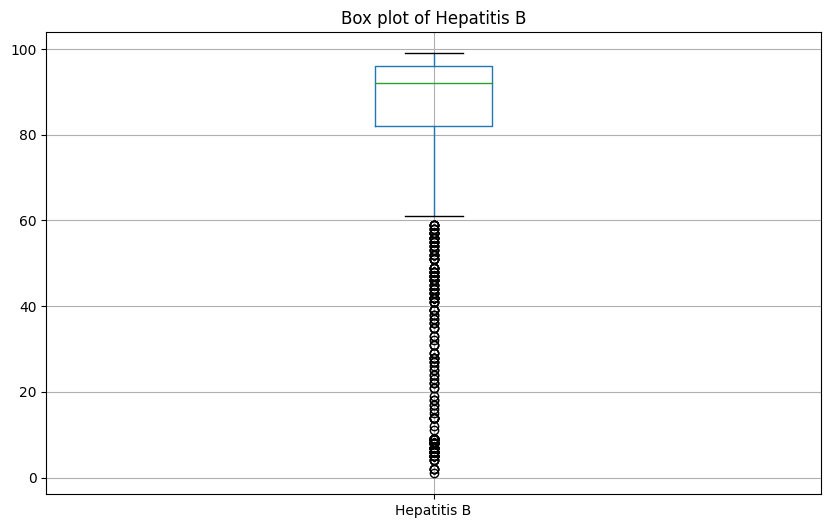

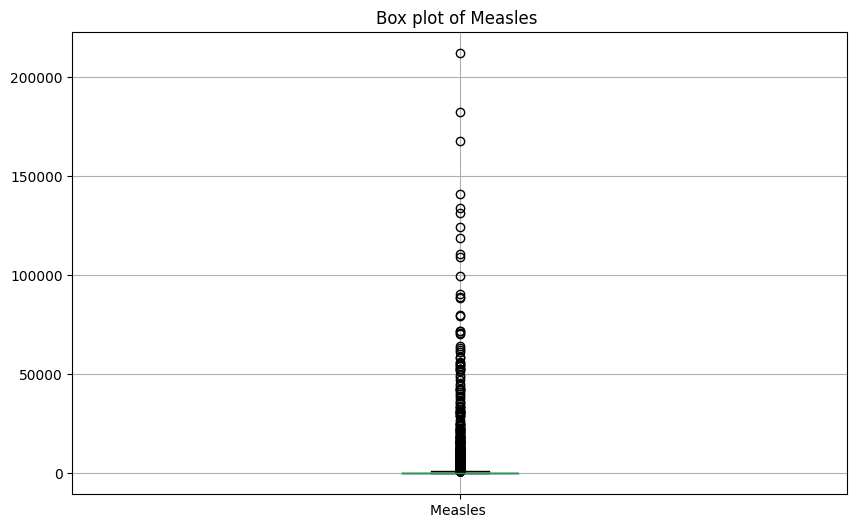

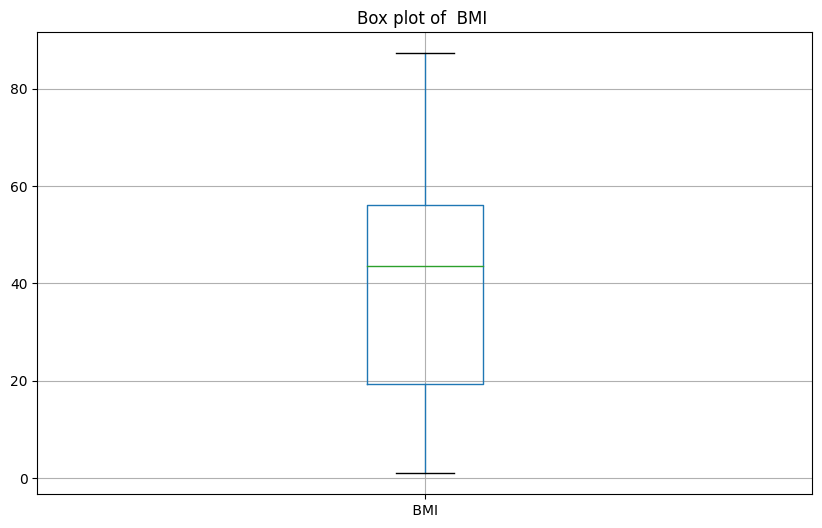

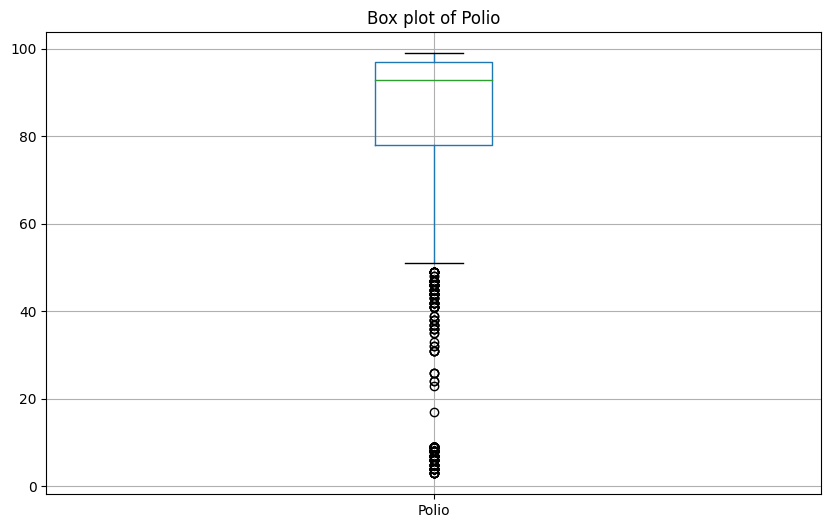

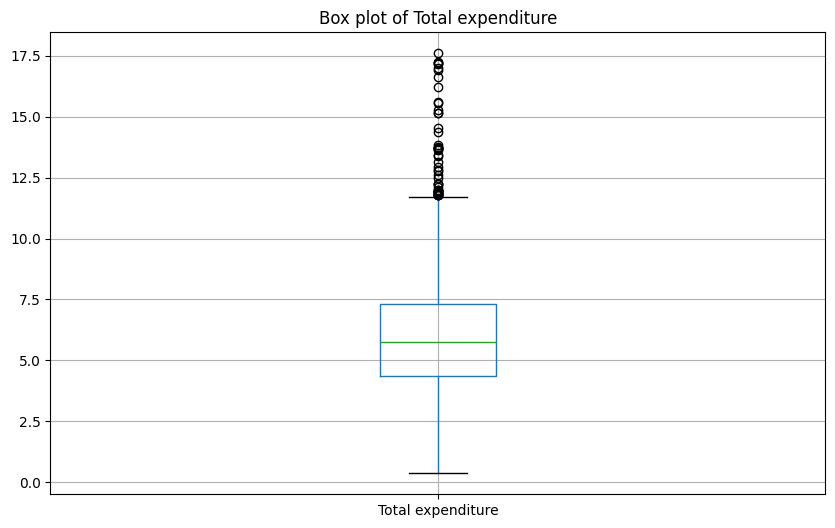

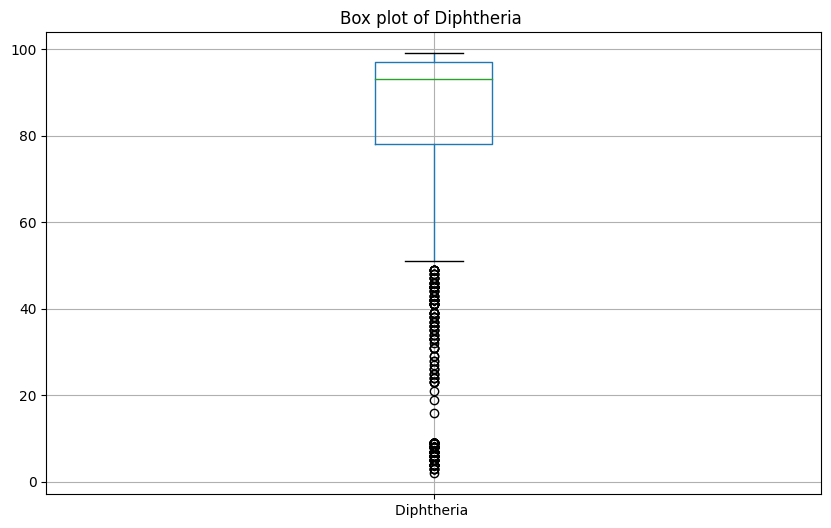

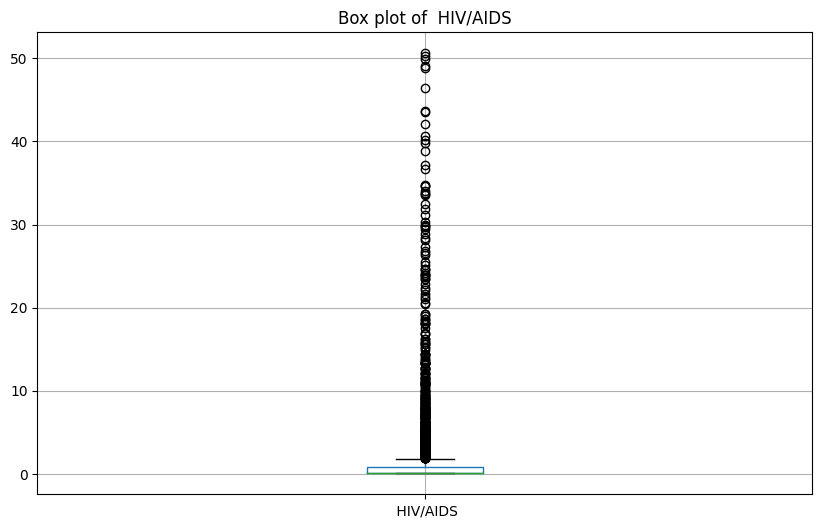

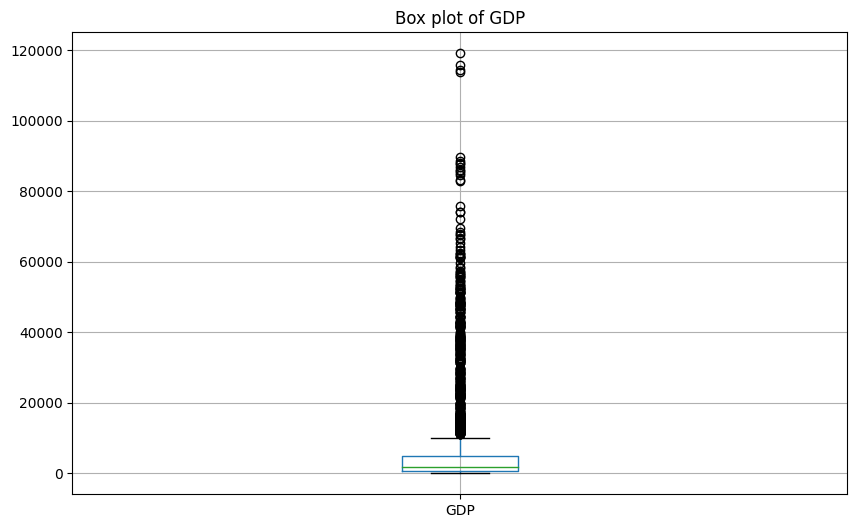

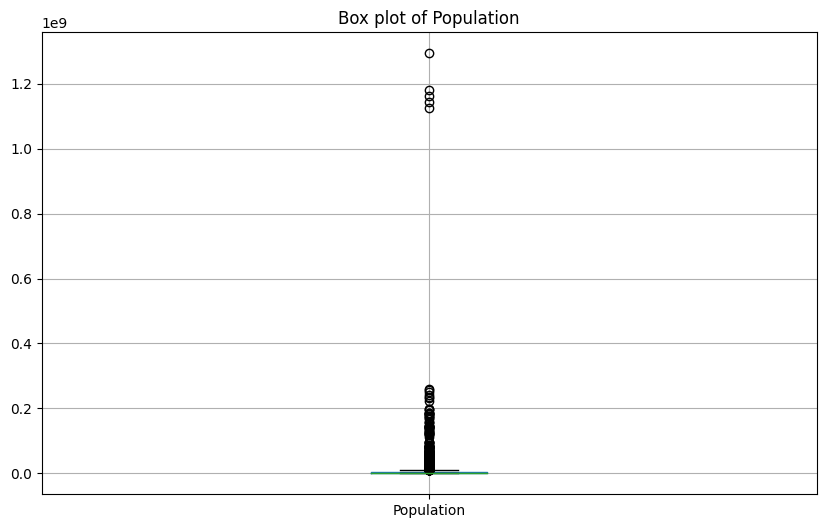

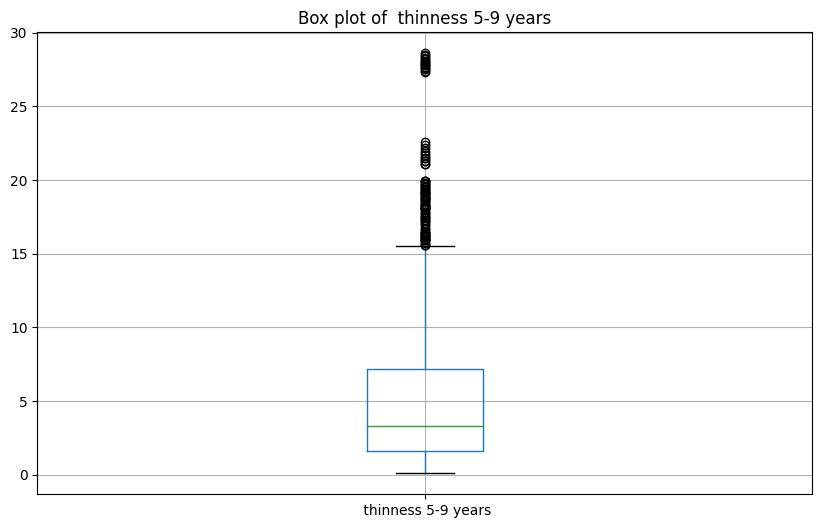

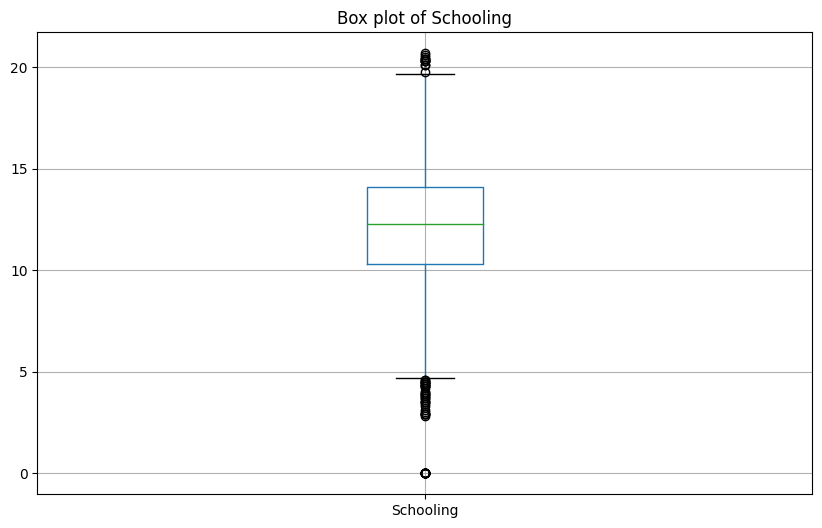

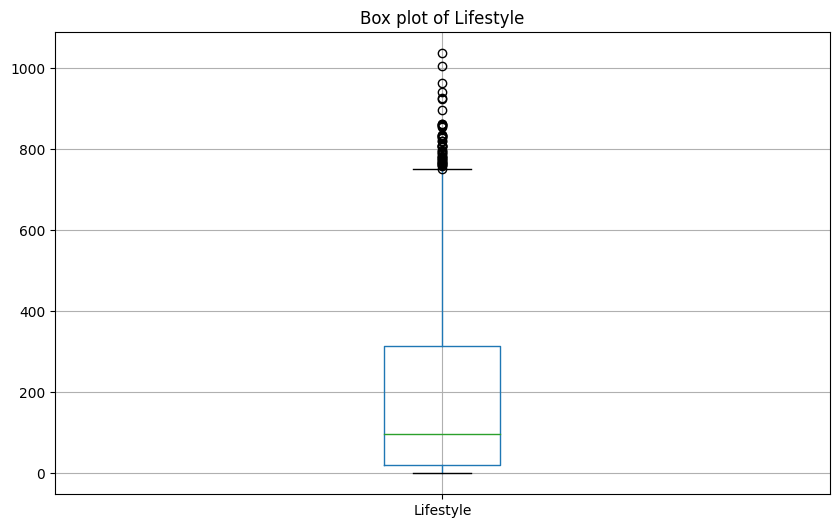

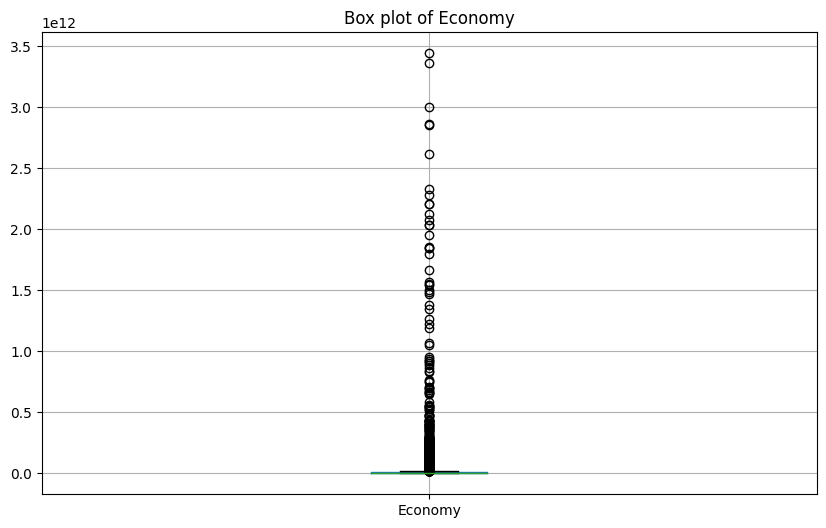

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1257: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1264: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1273: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


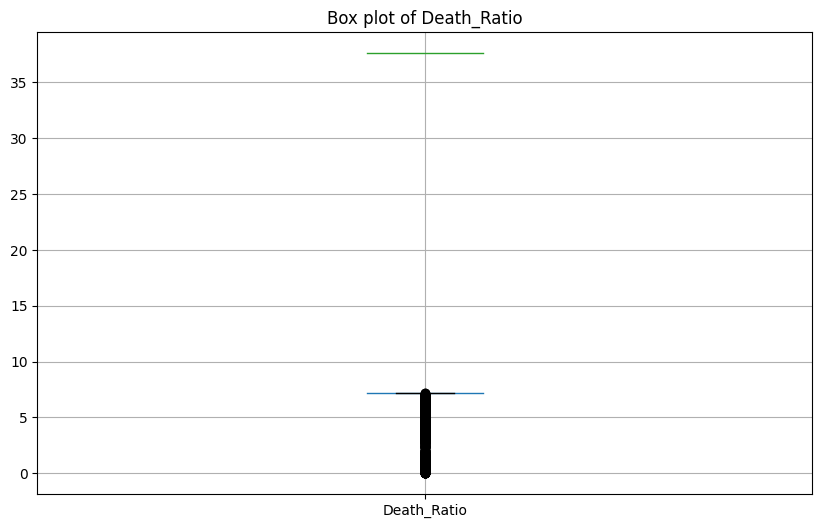

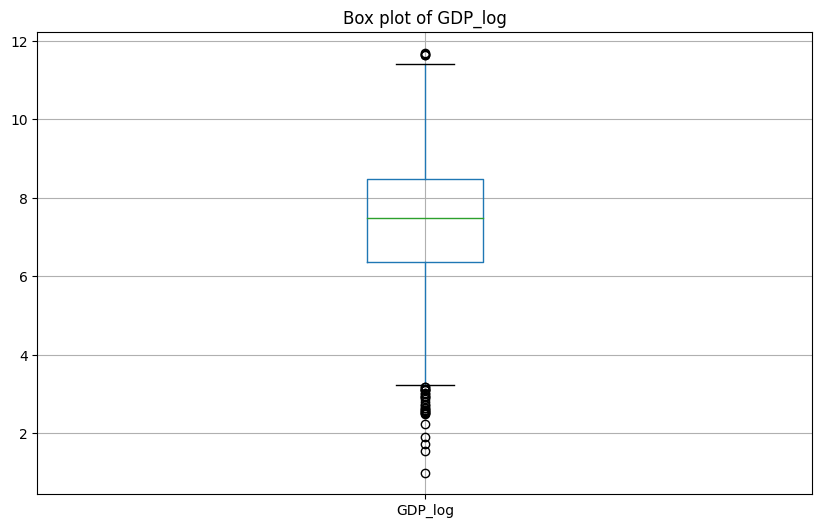

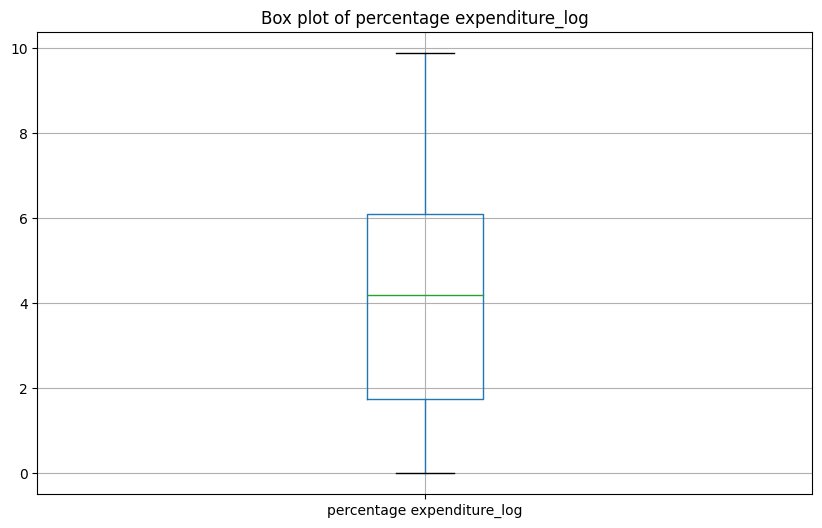

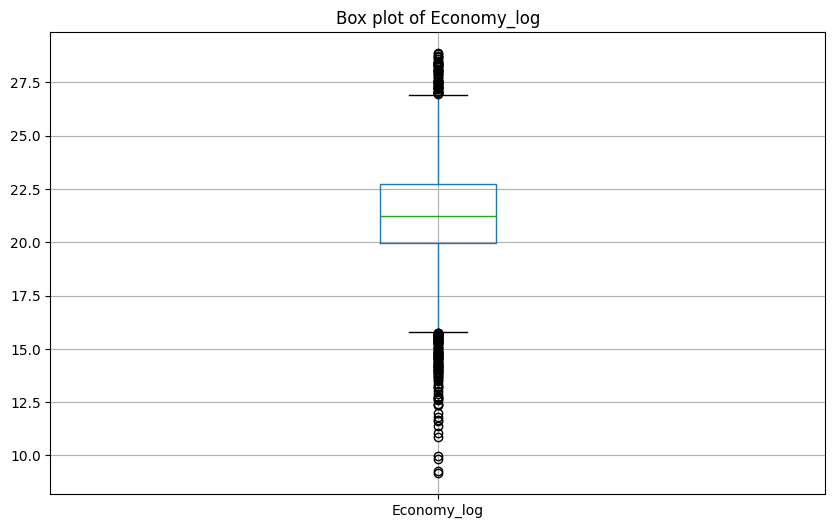

In [22]:
# Generate box plots
numeric_columns = df.select_dtypes(include=[np.number]).columns
for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    df.boxplot(column=column)
    plt.title(f'Box plot of {column}')
    plt.show()

In [23]:
def replace_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.clip(df[column], lower_bound, upper_bound)
    return df

In [24]:
# when remove outlier is applied for all the columns the resulting data frame is turning out ot be empty
# i.e all the rows end up being removed.
# instead of removing, clipping the values to betwen the lower and uppper bounds to prevent loss of data

In [25]:
for column in numeric_columns:
    df = replace_outliers(df, column)

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


In [26]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Hepatitis B,Measles,BMI,Polio,...,Population,thinness 5-9 years,Schooling,Population_Category,Lifestyle,Economy,Death_Ratio,GDP_log,percentage expenditure_log,Economy_log
0,Afghanistan,2015,Developing,65.0,263.0,55,65.0,900.625,19.1,49.5,...,10832552.25,15.6,10.1,Large,0.191,1.810142e+10,4.241935,6.372055,4.280542,23.704435
1,Afghanistan,2014,Developing,59.9,271.0,55,62.0,492.000,18.6,58.0,...,327582.00,15.6,10.0,Large,0.186,2.007083e+08,4.234375,6.419501,4.311116,19.117363
2,Afghanistan,2013,Developing,59.9,268.0,55,64.0,430.000,18.1,62.0,...,10832552.25,15.6,9.9,Large,0.181,1.810142e+10,4.060606,6.450067,4.307023,23.721312
3,Afghanistan,2012,Developing,59.5,272.0,55,67.0,900.625,17.6,67.0,...,3696958.00,15.6,9.8,Large,0.176,2.476810e+09,3.942029,6.508708,4.371777,21.630237
4,Afghanistan,2011,Developing,59.2,275.0,55,68.0,900.625,17.2,68.0,...,2978599.00,15.6,9.5,Large,0.172,1.892519e+08,3.873239,4.167242,2.091507,19.058590


### Task 5:
Perform data analysis to answer the following questions:
* Should a country having a lower life expectancy value (<65) increase its healthcare expenditure to improve its average lifespan?
* What is the impact of schooling on the lifespan of humans?
* Does Life Expectancy have a positive or negative relationship with drinking alcohol?
* Do densely populated countries tend to have a lower life expectancy?

In [27]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Hepatitis B', 'Measles ', ' BMI ', 'Polio',
       'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness 5-9 years', 'Schooling', 'Population_Category', 'Lifestyle',
       'Economy', 'Death_Ratio', 'GDP_log', 'percentage expenditure_log',
       'Economy_log'],
      dtype='object')

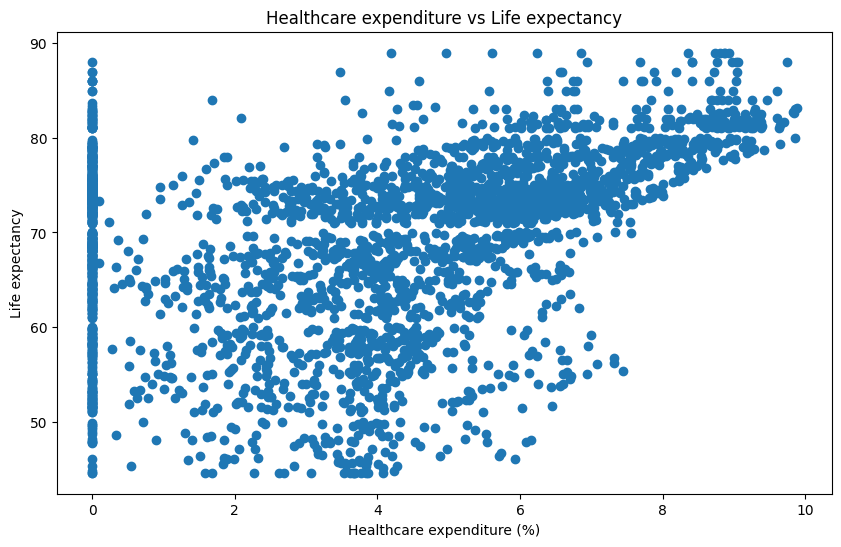

In [28]:
# Question 1: Healthcare expenditure vs Life expectancy
plt.figure(figsize=(10, 6))
plt.scatter(df['percentage expenditure_log'], df['Life expectancy '])
plt.xlabel('Healthcare expenditure (%)')
plt.ylabel('Life expectancy')
plt.title('Healthcare expenditure vs Life expectancy')
plt.show()

* The scatter plot indicate a positive correlation between the healthcare expenditure and life expectancy.
 * There are visible clusters of data points where countries with higher expenditure % have higher life expectancy where as lower expenditure % tend to have wider range of expectancy

 to conclude, countires with life expectancy below 65 should consider increasing healthcare expenditure to improve average lifespan

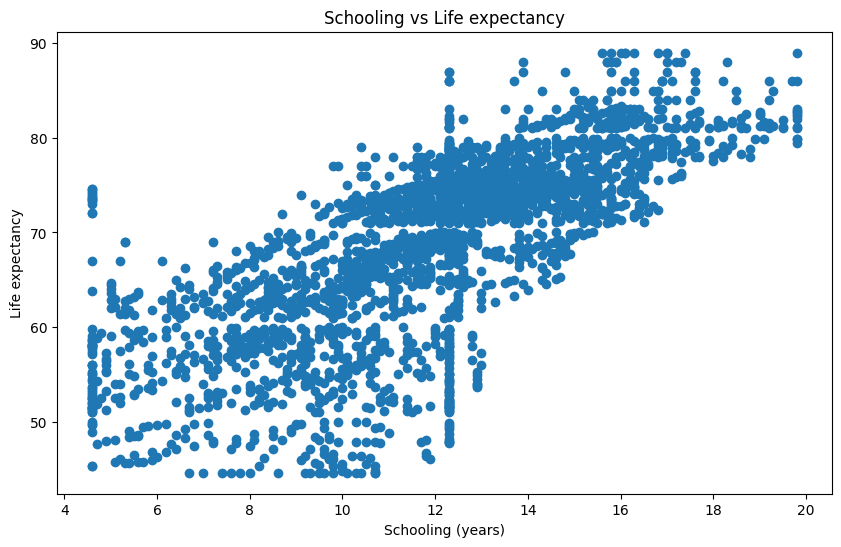

In [29]:
# Question 2: Schooling vs Life expectancy
plt.figure(figsize=(10, 6))
plt.scatter(df['Schooling'], df['Life expectancy '])
plt.xlabel('Schooling (years)')
plt.ylabel('Life expectancy')
plt.title('Schooling vs Life expectancy')
plt.show()

The above plot indicates a positive trend where the life expectancy increases with number of schooling years indicating a strong positive correlation. So Increasing the average years of schooling will increase average lifespan of the individuals

In [30]:
# Question 3: Alcohol consumption vs Life expectancy
# df['Alcohol']

At this point the Alcohol columns seems to be removed from the earlier task becuase of the high-correlation with Lifestyle feature But based on the earlier scatter plot of Alcohol consumption vs Life Expectancy :

* There isn't a clear positive or negative trend between alcohol consumption and life expectancy indicating a weal or non linear relationship
* There are cluster of datapoints with varying levels of alcohol consumption which does not give a clear idea on the coreelation between the two features. This is also supporeted by the correlation value of 0.39 in the corellation matrix between alcohol consumption and life expectancy

To conclude there is no postive or negative relationsip with drinking alocohol

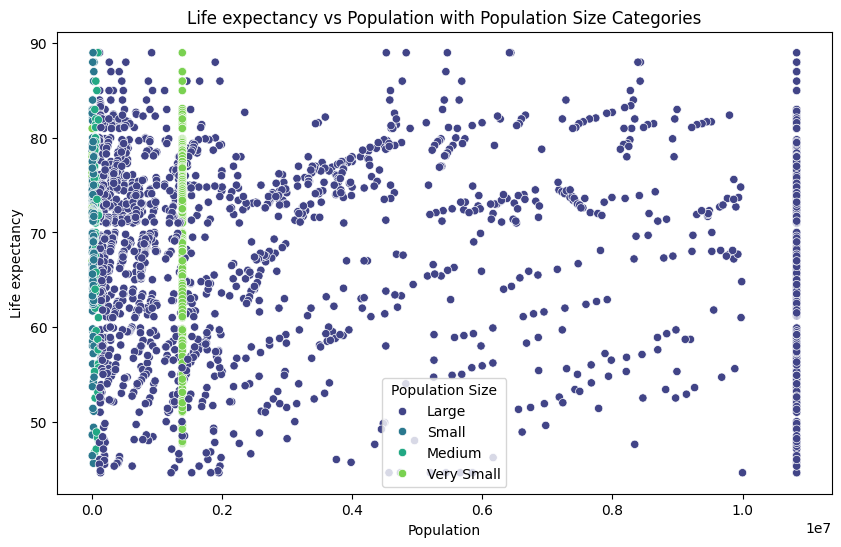

The correlation between population and life expectancy is: -0.08


In [31]:
# Question 4: Population density vs Life expectancy
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Population', y='Life expectancy ', hue='Population_Category', palette='viridis')
plt.xlabel('Population')
plt.ylabel('Life expectancy')
plt.title('Life expectancy vs Population with Population Size Categories')
plt.legend(title='Population Size')
plt.show()

# Correlation analysis
correlation = df['Population'].corr(df['Life expectancy '])
print(f'The correlation between population and life expectancy is: {correlation:.2f}')

The scatter plot and correlation analysis indicate that there is no clear relationship between population density and life expectancy, suggesting that other factors are more significant in determining life expectancy.

###Task 6:    
Split the remaining data into around 75% for training and 25% for the test set. Train the linear regression model and assess the performance on the training set, test set, and the entire dataset.

For assessing model performance, use various metrics such as Root Mean Square Error (RMSE), Mean Absolute Percentage Error (MAPE), and R2 Score.
Draw a residual scatter plot between the target variable on the x-axis and predicted values on the y-axis. The scatter plot should contain an ideal unity line that represents the cases when predicted values are the same as target values. The plot will contain dotted error lines corresponding to +/- 5 colored as yellow and +/- 10 years colored as red. These lines will provide easier visualization of data performance to see data scatter.

Draw residual histogram.
Perform appropriate cross-validation to check if the linear regression model has data overfit. Generate a box plot to display model performance for each fold. Also, determine the mean and standard deviation of overall performance.

In [32]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country                     2938 non-null   object 
 1   Year                        2938 non-null   int64  
 2   Status                      2938 non-null   object 
 3   Life expectancy             2938 non-null   float64
 4   Adult Mortality             2938 non-null   float64
 5   infant deaths               2938 non-null   int64  
 6   Hepatitis B                 2938 non-null   float64
 7   Measles                     2938 non-null   float64
 8    BMI                        2938 non-null   float64
 9   Polio                       2938 non-null   float64
 10  Total expenditure           2938 non-null   float64
 11  Diphtheria                  2938 non-null   float64
 12   HIV/AIDS                   2938 non-null   float64
 13  GDP                         2938 

In [34]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Hepatitis B,Measles,BMI,Polio,...,Population,thinness 5-9 years,Schooling,Population_Category,Lifestyle,Economy,Death_Ratio,GDP_log,percentage expenditure_log,Economy_log
0,Afghanistan,2015,Developing,65.0,263.0,55,65.0,900.625,19.1,49.5,...,10832552.25,15.6,10.1,Large,0.191,1.810142e+10,4.241935,6.372055,4.280542,23.704435
1,Afghanistan,2014,Developing,59.9,271.0,55,62.0,492.000,18.6,58.0,...,327582.00,15.6,10.0,Large,0.186,2.007083e+08,4.234375,6.419501,4.311116,19.117363
2,Afghanistan,2013,Developing,59.9,268.0,55,64.0,430.000,18.1,62.0,...,10832552.25,15.6,9.9,Large,0.181,1.810142e+10,4.060606,6.450067,4.307023,23.721312
3,Afghanistan,2012,Developing,59.5,272.0,55,67.0,900.625,17.6,67.0,...,3696958.00,15.6,9.8,Large,0.176,2.476810e+09,3.942029,6.508708,4.371777,21.630237
4,Afghanistan,2011,Developing,59.2,275.0,55,68.0,900.625,17.2,68.0,...,2978599.00,15.6,9.5,Large,0.172,1.892519e+08,3.873239,4.167242,2.091507,19.058590


In [35]:
df = pd.get_dummies(df, columns=['Population_Category'])
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Hepatitis B,Measles,BMI,Polio,...,Lifestyle,Economy,Death_Ratio,GDP_log,percentage expenditure_log,Economy_log,Population_Category_Large,Population_Category_Medium,Population_Category_Small,Population_Category_Very Small
0,Afghanistan,2015,Developing,65.0,263.0,55,65.0,900.625,19.1,49.5,...,0.191,1.810142e+10,4.241935,6.372055,4.280542,23.704435,True,False,False,False
1,Afghanistan,2014,Developing,59.9,271.0,55,62.0,492.000,18.6,58.0,...,0.186,2.007083e+08,4.234375,6.419501,4.311116,19.117363,True,False,False,False
2,Afghanistan,2013,Developing,59.9,268.0,55,64.0,430.000,18.1,62.0,...,0.181,1.810142e+10,4.060606,6.450067,4.307023,23.721312,True,False,False,False
3,Afghanistan,2012,Developing,59.5,272.0,55,67.0,900.625,17.6,67.0,...,0.176,2.476810e+09,3.942029,6.508708,4.371777,21.630237,True,False,False,False
4,Afghanistan,2011,Developing,59.2,275.0,55,68.0,900.625,17.2,68.0,...,0.172,1.892519e+08,3.873239,4.167242,2.091507,19.058590,True,False,False,False


In [36]:
# Calculate mean of 'Death_Ratio' column, excluding infinity values
mean_death_ratio = df['Death_Ratio'][np.isfinite(df['Death_Ratio'])].mean()

# Replace infinity values with the mean
df['Death_Ratio'].replace([np.inf, -np.inf], mean_death_ratio, inplace=True)

In [37]:
X = df.drop(['Life expectancy ', 'Country', 'Year', 'Status', 'Population', 'GDP', 'Economy'], axis=1)
y = df['Life expectancy ']

In [38]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [39]:
# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [40]:

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
y_all_pred = model.predict(X)

In [41]:
# Calculate performance metrics
def calculate_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return rmse, mape, r2

In [42]:
train_metrics = calculate_metrics(y_train, y_train_pred)
test_metrics = calculate_metrics(y_test, y_test_pred)
all_metrics = calculate_metrics(y, y_all_pred)

In [43]:
print("Train set metrics (RMSE, MAPE, R2):", train_metrics)
print("Test set metrics (RMSE, MAPE, R2):", test_metrics)
print("All data metrics (RMSE, MAPE, R2):", all_metrics)

Train set metrics (RMSE, MAPE, R2): (3.8666271592099886, 0.04379631110169809, 0.8335094660528359)
Test set metrics (RMSE, MAPE, R2): (3.6832096166573707, 0.04290239279303875, 0.8490409379483369)
All data metrics (RMSE, MAPE, R2): (3.821567321854879, 0.043572679394119934, 0.8374768855150394)


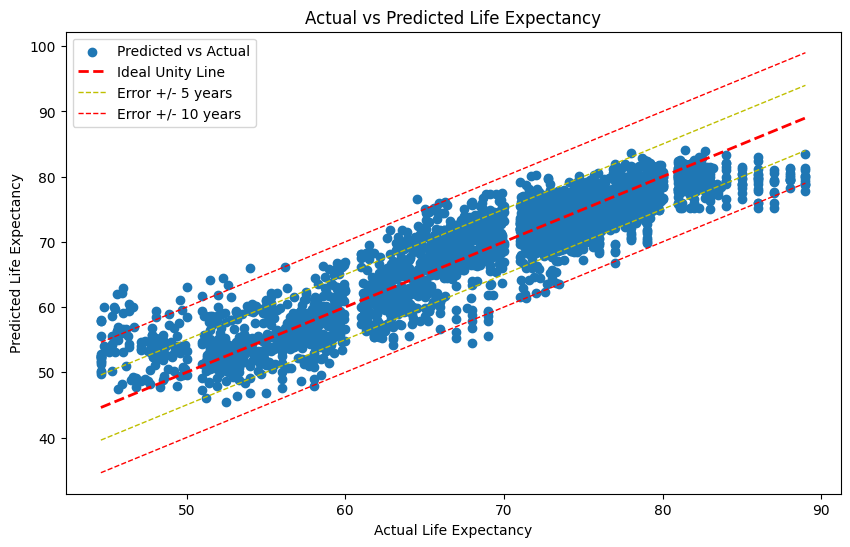

In [44]:
# Draw residual scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y, y_all_pred, label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Ideal Unity Line')
plt.plot([y.min(), y.max()], [y.min()-5, y.max()-5], 'y--', lw=1, label='Error +/- 5 years')
plt.plot([y.min(), y.max()], [y.min()+5, y.max()+5], 'y--', lw=1)
plt.plot([y.min(), y.max()], [y.min()-10, y.max()-10], 'r--', lw=1, label='Error +/- 10 years')
plt.plot([y.min(), y.max()], [y.min()+10, y.max()+10], 'r--', lw=1)
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Actual vs Predicted Life Expectancy')
plt.legend()
plt.show()

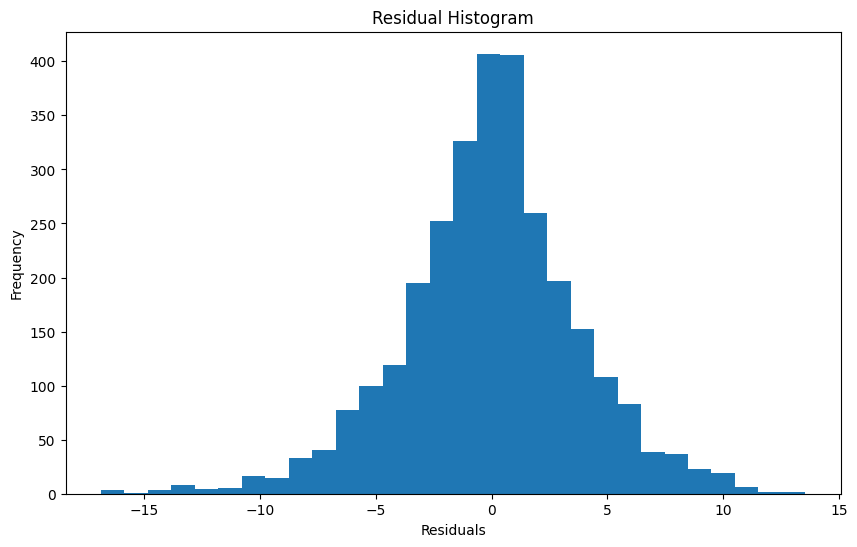

In [45]:
# Draw residual histogram
residuals = y - y_all_pred
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Histogram')
plt.show()

In [46]:
# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores)

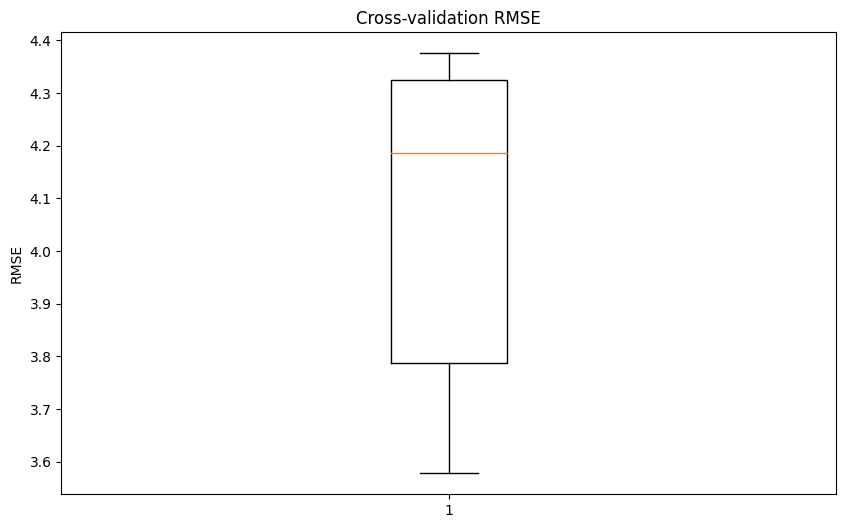

In [47]:
plt.figure(figsize=(10, 6))
plt.boxplot(cv_rmse)
plt.ylabel('RMSE')
plt.title('Cross-validation RMSE')
plt.show()

In [48]:
print("Mean CV RMSE:", cv_rmse.mean())
print("Standard deviation of CV RMSE:", cv_rmse.std())

Mean CV RMSE: 4.050986030500125
Standard deviation of CV RMSE: 0.31369788095604684


### Task 6:
Determine the minimum number of features and which features need to be included to ensure that all the data is bound within the error lines mentioned above.

In [105]:
import statsmodels.api as sm

# Here, we will use stepwise feature selection to iteratively add or remove features based on their statistical significance
# # Draw residual histogram for selected features

# Function for stepwise feature selection
def stepwise_selection(X, y, initial_list=[], threshold_in=0.01, threshold_out=0.01, verbose=True):
    included = list(initial_list)
    while True:
        changed = False
        # Forward step
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included + [new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed = True
            if verbose:
                print(f'Add  {best_feature:30} with p-value {best_pval:.6}')

        # Backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()  # null if pvalues is empty
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(f'Drop {worst_feature:30} with p-value {worst_pval:.6}')
        if not changed:
            break

    return included

In [106]:
selected_features = stepwise_selection(X.select_dtypes(include=['number']), y)

Add  Adult Mortality                with p-value 0.0
Add   HIV/AIDS                      with p-value 0.0
Add  Schooling                      with p-value 1.65489e-252
Add  infant deaths                  with p-value 3.50563e-47
Add  Diphtheria                     with p-value 3.03699e-30
Add  GDP_log                        with p-value 4.27504e-26
Add   thinness 5-9 years            with p-value 3.9097e-19
Add  Hepatitis B                    with p-value 6.23225e-07
Add  Lifestyle                      with p-value 1.19566e-05
Add  Polio                          with p-value 0.00136271
Add  Economy_log                    with p-value 0.00532215


In [107]:
# Train model with selected features
X_selected = X[selected_features]
X_train_selected, X_test_selected, y_train, y_test = train_test_split(X_selected, y, test_size=0.25, random_state=42)

In [108]:
model = LinearRegression()
model.fit(X_train_selected, y_train)

LinearRegression()

In [109]:
y_train_pred_selected = model.predict(X_train_selected)
y_test_pred_selected = model.predict(X_test_selected)
y_all_pred_selected = model.predict(X_selected)


In [110]:
train_metrics_selected = calculate_metrics(y_train, y_train_pred_selected)
test_metrics_selected = calculate_metrics(y_test, y_test_pred_selected)
all_metrics_selected = calculate_metrics(y, y_all_pred_selected)

In [111]:
print("Selected features:", selected_features)
print("Train set metrics with selected features (RMSE, MAPE, R2):", train_metrics_selected)
print("Test set metrics with selected features (RMSE, MAPE, R2):", test_metrics_selected)
print("All data metrics with selected features (RMSE, MAPE, R2):", all_metrics_selected)

Selected features: ['Adult Mortality', ' HIV/AIDS', 'Schooling', 'infant deaths', 'Diphtheria ', 'GDP_log', ' thinness 5-9 years', 'Hepatitis B', 'Lifestyle', 'Polio', 'Economy_log']
Train set metrics with selected features (RMSE, MAPE, R2): (3.871152474234579, 0.04381449861632678, 0.833119532931156)
Test set metrics with selected features (RMSE, MAPE, R2): (3.693510003355917, 0.043047228863358857, 0.8481954194313195)
All data metrics with selected features (RMSE, MAPE, R2): (3.8274850034201005, 0.04362255060120376, 0.8369731630377336)


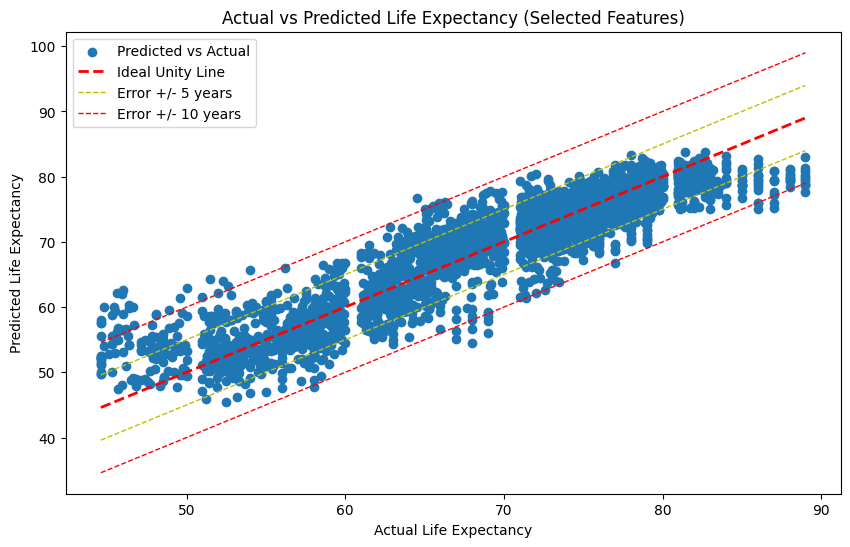

In [112]:
# Draw residual scatter plot for selected features
plt.figure(figsize=(10, 6))
plt.scatter(y, y_all_pred_selected, label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Ideal Unity Line')
plt.plot([y.min(), y.max()], [y.min()-5, y.max()-5], 'y--', lw=1, label='Error +/- 5 years')
plt.plot([y.min(), y.max()], [y.min()+5, y.max()+5], 'y--', lw=1)
plt.plot([y.min(), y.max()], [y.min()-10, y.max()-10], 'r--', lw=1, label='Error +/- 10 years')
plt.plot([y.min(), y.max()], [y.min()+10, y.max()+10], 'r--', lw=1)
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Actual vs Predicted Life Expectancy (Selected Features)')
plt.legend()
plt.show()

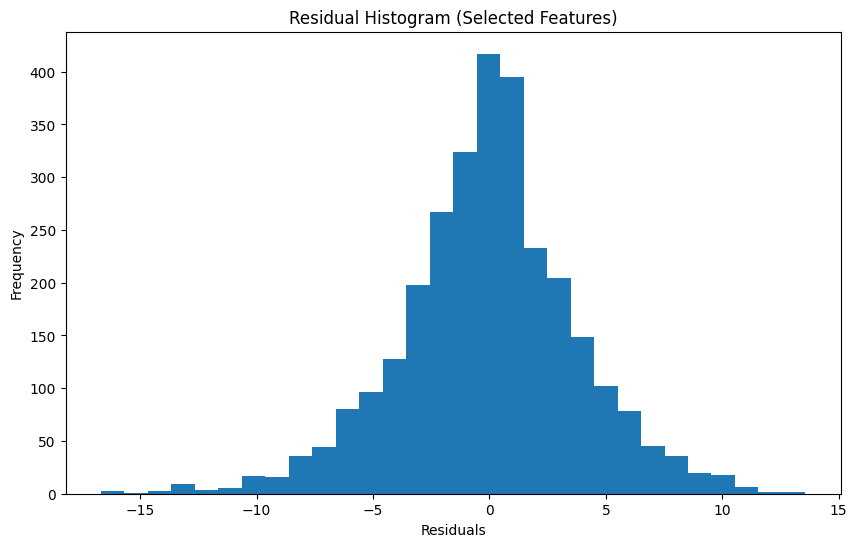

In [113]:
# Draw residual histogram for selected features
residuals_selected = y - y_all_pred_selected
plt.figure(figsize=(10, 6))
plt.hist(residuals_selected, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Histogram (Selected Features)')
plt.show()

In [114]:
# Perform cross-validation for selected features
cv_scores_selected = cross_val_score(model, X_selected, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse_selected = np.sqrt(-cv_scores_selected)

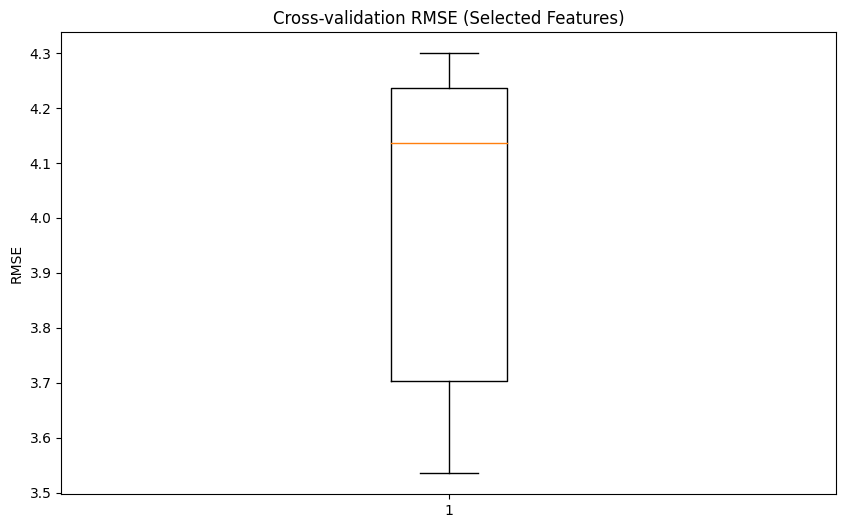

In [115]:
plt.figure(figsize=(10, 6))
plt.boxplot(cv_rmse_selected)
plt.ylabel('RMSE')
plt.title('Cross-validation RMSE (Selected Features)')
plt.show()

In [116]:
print("Mean CV RMSE (Selected Features):", cv_rmse_selected.mean())
print("Standard deviation of CV RMSE (Selected Features):", cv_rmse_selected.std())

Mean CV RMSE (Selected Features): 3.982311896192401
Standard deviation of CV RMSE (Selected Features): 0.3055403180691313


By performing stepwise feature selection, we determine the minimum number of features needed to ensure that the data is bound within the specified error lines. The selected features provide a more accurate and efficient model for predicting life expectancy.